In [0]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

import pandas as pd

In [0]:
# Hyperparameters
randseed = 0
epochs = 50000

## 预处理

In [0]:
# import os
# import requests

filename_in = "/content/drive/My Drive/banana.dat"

# if not os.path.exists(filename_in):
#   filename_url = 'https://sci2s.ugr.es/keel/dataset/data/classification/banana.zip'
#   fin = requests.get(filename_url)
#   a = fin.readlines()
# else:
#   fin = open(filename_in, 'r')
#   a = fin.readlines()

fin = open(filename_in, 'r')
a = fin.readlines()

filename_out = "./banana.csv"
fout = open(filename_out, 'w')
b = ''.join(a[7:])
fout.write("at1,at2,label \n"+b)

df = pd.read_csv(r"./banana.csv")
df.columns = ['at1','at2','label']

df['label'].replace(to_replace=-1, value=0, inplace=True)

In [0]:
x = df[["at1", "at2"]].values
y = df["label"].values
# print(at)
# print(label)

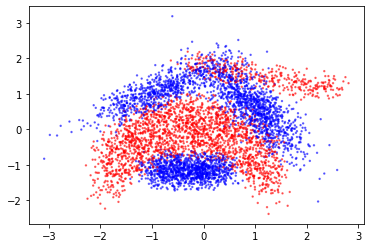

In [38]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.bwr, s=2, marker='o',alpha=0.5)

In [0]:
# 打乱数据集
np.random.seed(randseed)
np.random.shuffle(x) 
np.random.seed(randseed)
np.random.shuffle(y)

In [0]:
# 划分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## NN

### Training

In [0]:
X_train = torch.from_numpy(x_train).type(torch.FloatTensor)
Y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

#our class must extend nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        # This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(2,30)
        
        self.fc2 = nn.Linear(30,10)

        self.fc3 = nn.Linear(10,30)

        # This applies linear transformation to produce output data
        self.fc4 = nn.Linear(30,2)
        
    # This must be implemented
    def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        x = self.fc2(x)
        x = torch.tanh(x)
        x = self.fc3(x)
        x = torch.tanh(x)
        x = self.fc4(x)
        return x
        
    # This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [11]:
#Initialize the model        
model = Net()
print(model)

#Define loss criterion
criterion = nn.CrossEntropyLoss()

#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Net(
  (fc1): Linear(in_features=2, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=30, bias=True)
  (fc4): Linear(in_features=30, out_features=2, bias=True)
)


  3%|▎         | 1499/50000 [01:35<51:03, 15.83it/s]

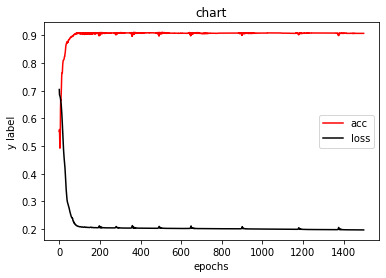

  3%|▎         | 1501/50000 [01:35<1:25:52,  9.41it/s]


Accuracy:  0.9075471698113208
Loss: tensor(0.1968, grad_fn=<NllLossBackward>)


  5%|▍         | 2499/50000 [02:38<50:21, 15.72it/s]

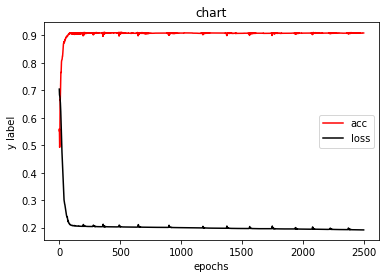

  5%|▌         | 2503/50000 [02:39<1:08:30, 11.55it/s]


Accuracy:  0.9088948787061994
Loss: tensor(0.1917, grad_fn=<NllLossBackward>)


 10%|▉         | 4999/50000 [05:17<49:14, 15.23it/s]

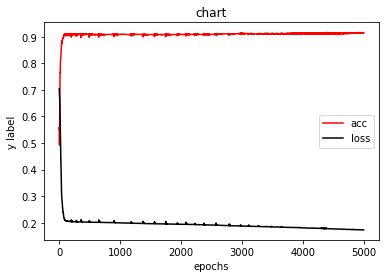

 10%|█         | 5003/50000 [05:17<1:06:40, 11.25it/s]


Accuracy:  0.9148247978436658
Loss: tensor(0.1734, grad_fn=<NllLossBackward>)


 15%|█▍        | 7499/50000 [07:56<45:07, 15.70it/s]

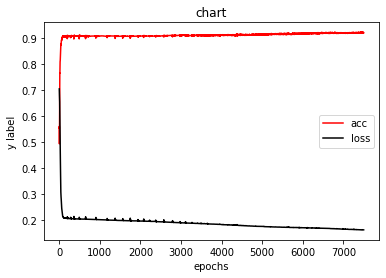

 15%|█▌        | 7503/50000 [07:56<1:03:27, 11.16it/s]


Accuracy:  0.9212938005390836
Loss: tensor(0.1607, grad_fn=<NllLossBackward>)


 20%|█▉        | 9999/50000 [10:40<50:18, 13.25it/s]

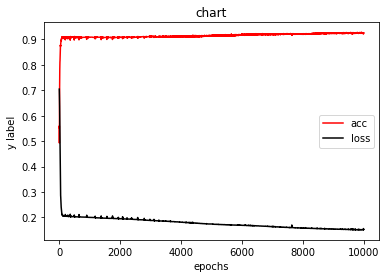

 20%|██        | 10001/50000 [10:40<1:19:19,  8.40it/s]


Accuracy:  0.9253369272237196
Loss: tensor(0.1528, grad_fn=<NllLossBackward>)


 25%|██▍       | 12499/50000 [13:29<39:43, 15.74it/s]

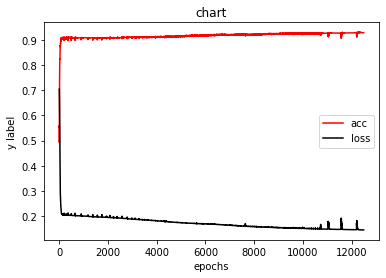

 25%|██▌       | 12503/50000 [13:29<58:19, 10.72it/s]  


Accuracy:  0.9288409703504044
Loss: tensor(0.1449, grad_fn=<NllLossBackward>)


 30%|██▉       | 14999/50000 [16:19<36:46, 15.86it/s]

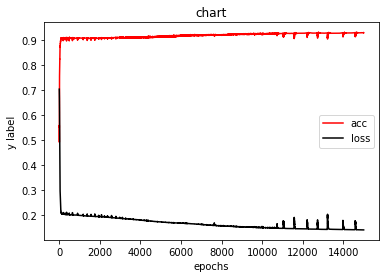

 30%|███       | 15003/50000 [16:20<55:05, 10.59it/s]  


Accuracy:  0.9304582210242588
Loss: tensor(0.1419, grad_fn=<NllLossBackward>)


 35%|███▍      | 17499/50000 [19:09<40:58, 13.22it/s]

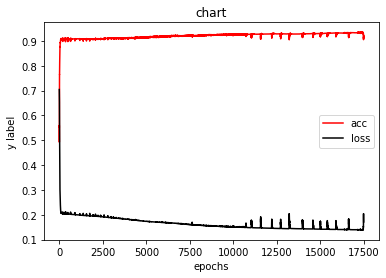

 35%|███▌      | 17503/50000 [19:09<55:46,  9.71it/s]  


Accuracy:  0.9185983827493261
Loss: tensor(0.1709, grad_fn=<NllLossBackward>)


 40%|███▉      | 19999/50000 [21:53<31:37, 15.81it/s]

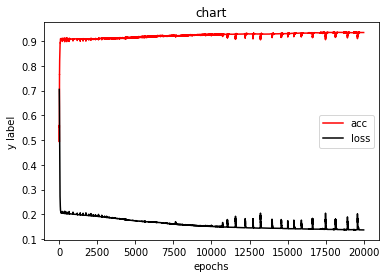

 40%|████      | 20003/50000 [21:54<52:50,  9.46it/s]  


Accuracy:  0.9345013477088949
Loss: tensor(0.1367, grad_fn=<NllLossBackward>)


 45%|████▍     | 22499/50000 [24:42<29:39, 15.46it/s]

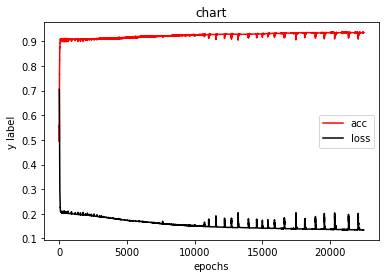

 45%|████▌     | 22501/50000 [24:43<55:49,  8.21it/s]


Accuracy:  0.9355795148247978
Loss: tensor(0.1349, grad_fn=<NllLossBackward>)


 50%|████▉     | 24999/50000 [27:30<26:29, 15.73it/s]

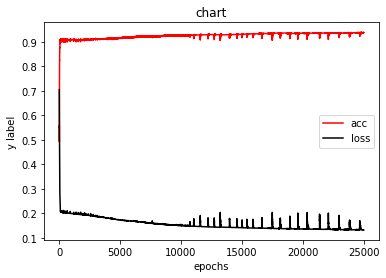

 50%|█████     | 25001/50000 [27:30<47:15,  8.82it/s]


Accuracy:  0.9366576819407008
Loss: tensor(0.1333, grad_fn=<NllLossBackward>)


 55%|█████▍    | 27499/50000 [30:14<33:34, 11.17it/s]

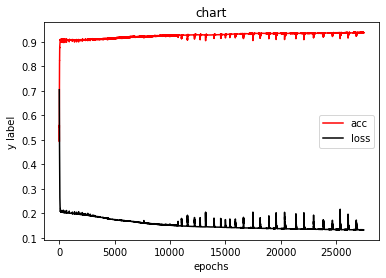

 55%|█████▌    | 27501/50000 [30:14<56:35,  6.63it/s]


Accuracy:  0.9380053908355795
Loss: tensor(0.1318, grad_fn=<NllLossBackward>)


 60%|█████▉    | 29999/50000 [33:05<27:52, 11.96it/s]

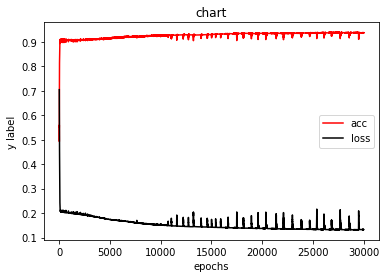

 60%|██████    | 30003/50000 [33:05<38:45,  8.60it/s]


Accuracy:  0.937466307277628
Loss: tensor(0.1328, grad_fn=<NllLossBackward>)


 65%|██████▌   | 32500/50000 [36:34<19:25, 15.01it/s]

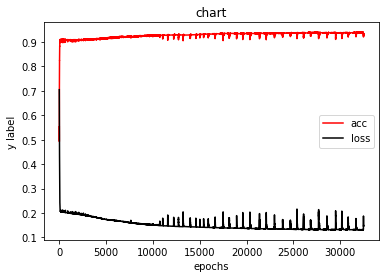

 65%|██████▌   | 32502/50000 [36:35<35:32,  8.21it/s]


Accuracy:  0.9334231805929919
Loss: tensor(0.1485, grad_fn=<NllLossBackward>)


 70%|██████▉   | 34999/50000 [40:12<21:15, 11.76it/s]

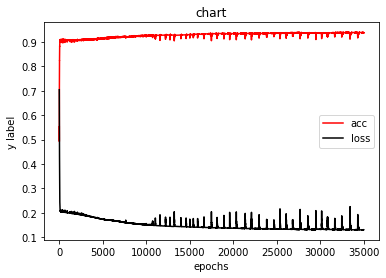

 70%|███████   | 35001/50000 [40:13<37:21,  6.69it/s]


Accuracy:  0.9371967654986523
Loss: tensor(0.1304, grad_fn=<NllLossBackward>)


 75%|███████▍  | 37499/50000 [43:30<13:48, 15.08it/s]

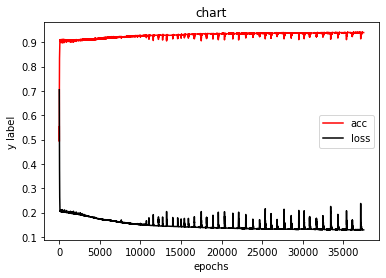

 75%|███████▌  | 37503/50000 [43:30<22:24,  9.30it/s]


Accuracy:  0.9393530997304582
Loss: tensor(0.1292, grad_fn=<NllLossBackward>)


 80%|████████  | 40000/50000 [46:21<10:53, 15.30it/s]

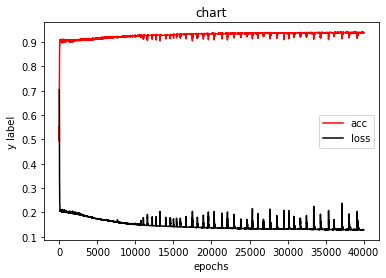

 80%|████████  | 40002/50000 [46:21<20:52,  7.98it/s]


Accuracy:  0.9393530997304582
Loss: tensor(0.1283, grad_fn=<NllLossBackward>)


 85%|████████▌ | 42500/50000 [49:09<08:31, 14.67it/s]

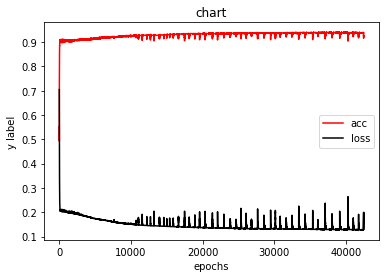

 85%|████████▌ | 42502/50000 [49:10<15:44,  7.94it/s]


Accuracy:  0.9253369272237196
Loss: tensor(0.1988, grad_fn=<NllLossBackward>)


 90%|█████████ | 45000/50000 [51:58<05:36, 14.84it/s]

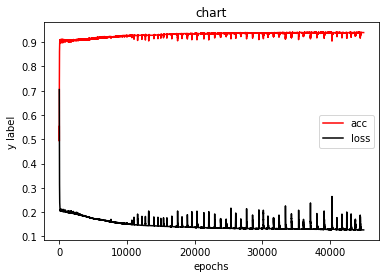

 90%|█████████ | 45002/50000 [51:58<10:37,  7.84it/s]


Accuracy:  0.9393530997304582
Loss: tensor(0.1265, grad_fn=<NllLossBackward>)


 95%|█████████▌| 47500/50000 [54:50<02:49, 14.78it/s]

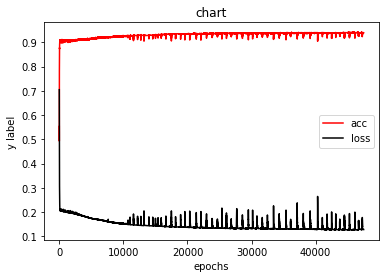

 95%|█████████▌| 47502/50000 [54:51<05:34,  7.47it/s]


Accuracy:  0.939622641509434
Loss: tensor(0.1275, grad_fn=<NllLossBackward>)


100%|██████████| 50000/50000 [57:40<00:00, 14.45it/s]


In [12]:
from sklearn.metrics import accuracy_score
from tqdm import trange

#List to store losses
losses = []

#List to store accuracy 
accuracy = []

for i in trange(epochs):
  if i!=0 and i% 2500 == 0:
    current_epochs = [t for t in range (i)]
    plt.plot(current_epochs,accuracy,color='r',label='acc')     # r 表示红色
    plt.plot(current_epochs,losses,color=(0,0,0),label='loss')  # 也可以用 RGB 值表示颜色
    plt.xlabel('epochs')    # x 轴表示
    plt.ylabel('y label')   # y 轴表示
    plt.title("chart")      # 图标标题表示
    plt.legend()            # 每条折线的 label 显示
    plt.show()
    print("\nAccuracy: ", accuracy_score(model.predict(X),y))
    print("Loss:", loss)
  if i == 1500:
    current_epochs = [t for t in range (i)]
    plt.plot(current_epochs,accuracy,color='r',label='acc')     # r 表示红色
    plt.plot(current_epochs,losses,color=(0,0,0),label='loss')  # 也可以用 RGB 值表示颜色
    plt.xlabel('epochs')    # x 轴表示
    plt.ylabel('y label')   # y 轴表示
    plt.title("chart")      # 图标标题表示
    plt.legend()            # 每条折线的 label 显示
    plt.show()
    print("\nAccuracy: ", accuracy_score(model.predict(X),y))
    print("Loss:", loss)
  #Precit the output for Given input
  y_pred = model.forward(X_train)
  #Compute Cross entropy loss
  loss = criterion(y_pred, Y_train)
  #Add loss to the list
  losses.append(loss.item())
  #Clear the previous gradients
  optimizer.zero_grad()
  #Compute gradients
  loss.backward()
  #Adjust weights
  optimizer.step()
  accuracy.append(accuracy_score(model.predict(X_train), Y_train))
    

### Evaluation

In [0]:
# X_test = torch.from_numpy(x_test).type(torch.FloatTensor)
# Y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [2]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())

NameError: ignored

In [40]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support_micro = precision_recall_fscore_support(y_test, predict(x_test), labels=[0, 1])
 
print("Precision: ", precision)
print("Recall : ", recall)
print("F1-score: ", fscore)
# f1_score(y_test, predict(x_test), labels=None, pos_label=1, average='binary', sample_weight=None)


Precision:  [0.87459459 0.9037594 ]
Recall :  [0.92668958 0.83821478]
F1-score:  [0.89988877 0.86975398]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


## SVM

In [17]:
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='poly', degree=6)
# svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma=6)
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=6, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svclassifier.predict(x_test)

In [19]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support_micro = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
 
print("Precision: ", precision)
print("Recall : ", recall)
print("F1-score: ", fscore)

Precision:  [0.59846903 0.91503268]
Recall :  [0.98510882 0.19525802]
F1-score:  [0.74458874 0.32183908]


## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 8, random_state = 0)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = dtree.predict(x_test)

In [74]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support_micro = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
 
print("Precision: ", precision)
print("Recall : ", recall)
print("F1-score: ", fscore)

Precision:  [0.87637969 0.88450292]
Recall :  [0.90950745 0.84379358]
F1-score:  [0.89263631 0.86366881]


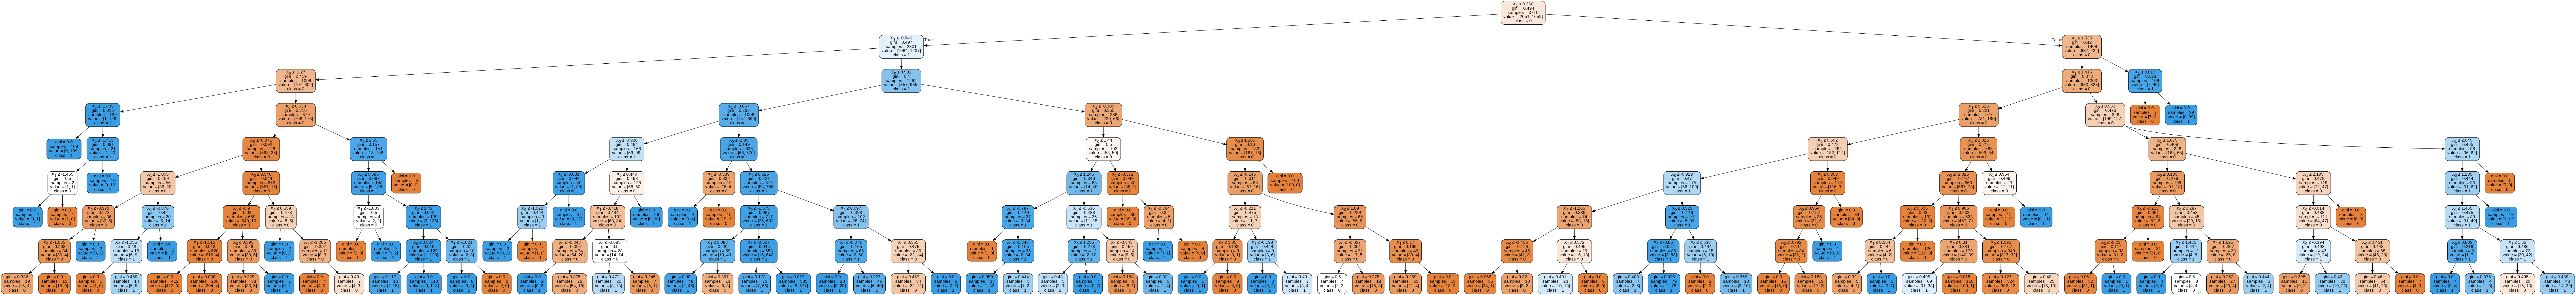

In [75]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names= None,  
                         class_names= ["0", "1"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 